# Coursera IBM Data Science Capstone Project - Final Assignment
Initiated March 18, 2020

In [1]:
print ('Lets wrap up this Capstone Project Course!')

Lets wrap up this Capstone Project Course!


In [2]:
# Import numpy and pandas
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
print('Libraries imported.')

Libraries imported.


#### Upload data files - ATL Zip Codes with population and US Zip Codes with wages
Note: I was unable to scrape the zip code data from http://zipatlas.com/us/ga/atlanta/zip-code-comparison/population-density.htm so had to download and upload to Github. Similarly, Zip Code wage data came from www.kaggle.com but had to download and upload to Github.

In [3]:
# Upload zip code wage data file
!wget 'https://raw.githubusercontent.com/jshorb99/Coursera_Capstone/master/free-zipcode-database.csv'

--2020-04-06 19:50:48--  https://raw.githubusercontent.com/jshorb99/Coursera_Capstone/master/free-zipcode-database.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12956481 (12M) [text/plain]
Saving to: ‘free-zipcode-database.csv’

100%[======================================>] 12,956,481  --.-K/s   in 0.1s    

2020-04-06 19:50:48 (108 MB/s) - ‘free-zipcode-database.csv’ saved [12956481/12956481]



In [4]:
# Upload zip code Atlanta population data file
!wget 'https://github.com/jshorb99/Coursera_Capstone/blob/master/Atlanta_zips.xlsx?raw=true'

--2020-04-06 19:50:54--  https://github.com/jshorb99/Coursera_Capstone/blob/master/Atlanta_zips.xlsx?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jshorb99/Coursera_Capstone/raw/master/Atlanta_zips.xlsx [following]
--2020-04-06 19:50:54--  https://github.com/jshorb99/Coursera_Capstone/raw/master/Atlanta_zips.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jshorb99/Coursera_Capstone/master/Atlanta_zips.xlsx [following]
--2020-04-06 19:50:54--  https://raw.githubusercontent.com/jshorb99/Coursera_Capstone/master/Atlanta_zips.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiti

In [55]:
zipwages = pd.read_csv('https://raw.githubusercontent.com/jshorb99/Coursera_Capstone/master/free-zipcode-database.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
atl_zip_pop = pd.read_excel('https://github.com/jshorb99/Coursera_Capstone/blob/master/Atlanta_zips.xlsx?raw=true')

In [7]:
atl_zip_pop.shape

(37, 7)

In [8]:
atl_zip_pop.head()

,line,Zipcode,Latitude,Longitude,Population,People_per_Sq_Mile,National_Rank
0,1,30313,33.764661,-84.397547,11035,9768.73,#617
1,2,30322,33.795590,-84.327312,1724,8794.33,#712
2,3,30308,33.770877,-84.377873,11796,7377.75,#947
3,4,30312,33.745377,-84.376180,20221,6289.52,"#1,230"
4,5,30314,33.757777,-84.431884,27181,5774.91,"#1,393"


In [21]:
atl_zip_pop.dtypes

line                    int64
Zipcode                 int64
Latitude              float64
Longitude             float64
Population              int64
People_per_Sq_Mile    float64
National_Rank          object
dtype: object

In [47]:
zipwages.shape

(81831, 20)

In [11]:
zipwages.head()

,RecordNumber,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Xaxis,Yaxis,Zaxis,WorldRegion,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes
0,1,704,STANDARD,PARC PARQUE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Parc Parque, PR",NA-US-PR-PARC PARQUE,False,NaN,NaN,NaN,NaN
1,2,704,STANDARD,PASEO COSTA DEL SUR,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Paseo Costa Del Sur, PR",NA-US-PR-PASEO COSTA DEL SUR,False,NaN,NaN,NaN,NaN
2,3,704,STANDARD,SECT LANAUSSE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Sect Lanausse, PR",NA-US-PR-SECT LANAUSSE,False,NaN,NaN,NaN,NaN
3,4,704,STANDARD,URB EUGENE RICE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Urb Eugene Rice, PR",NA-US-PR-URB EUGENE RICE,False,NaN,NaN,NaN,NaN
4,5,704,STANDARD,URB GONZALEZ,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Urb Gonzalez, PR",NA-US-PR-URB GONZALEZ,False,NaN,NaN,NaN,NaN


## Data Wrangling / Cleansing
Create new table merging City, State, Lat, Long, and TotalWages column data from zipwages with atl_zip_pop data

In [65]:
zipwages.dtypes

Zipcode                 object
City                    object
State                   object
Lat                    float64
Long                   float64
EstimatedPopulation    float64
TotalWages             float64
dtype: object

In [9]:
atl_zip_pop.dtypes

line                    int64
Zipcode                 int64
Latitude              float64
Longitude             float64
Population              int64
People_per_Sq_Mile    float64
National_Rank          object
dtype: object

#### Fix column data types as needed

In [66]:
# EXAMPLE: df[["normalized-losses"]] = df[["normalized-losses"]].astype("int") 
# zipwages[['Zipcode']] = zipwages[['Zipcode']].apply(pd.to_numeric) 
zipwages[["Zipcode"]] = zipwages[["Zipcode"]].astype("int") 

In [67]:
zipwages.head()

,Zipcode,City,State,Lat,Long,EstimatedPopulation,TotalWages
0,704,PARC PARQUE,PR,17.96,-66.22,NaN,NaN
8,705,AIBONITO,PR,18.14,-66.26,NaN,NaN
25,610,ANASCO,PR,18.28,-67.14,NaN,NaN
32,611,ANGELES,PR,18.28,-66.79,NaN,NaN
33,612,ARECIBO,PR,18.45,-66.73,NaN,NaN


#### Drop unneeded columns and duplicate records + data hygiene

In [62]:
# Drop unneeded columns from zipwages
zipwages = zipwages[['Zipcode', 'City', 'State','Lat','Long','EstimatedPopulation','TotalWages']]

In [60]:
# Fix zip code to be 5 characters long on dataframe
zipwages['Zipcode'] = zipwages['Zipcode'].apply(lambda x: '{0:0>5}'.format(x))

In [58]:
# Drop duplicate records for Zip Code from zipwages
zipwages = zipwages.drop_duplicates(subset='Zipcode', keep='first') 

In [14]:
zipwages.head()

,Zipcode,City,State,Lat,Long,EstimatedPopulation,TotalWages
0,00704,PARC PARQUE,PR,17.96,-66.22,NaN,NaN
8,00705,AIBONITO,PR,18.14,-66.26,NaN,NaN
25,00610,ANASCO,PR,18.28,-67.14,NaN,NaN
32,00611,ANGELES,PR,18.28,-66.79,NaN,NaN
33,00612,ARECIBO,PR,18.45,-66.73,NaN,NaN


In [68]:
# Create new df merging zipwages with atl_zip_pop data
newzip = atl_zip_pop.merge(zipwages, left_on='Zipcode', right_on='Zipcode') 

In [69]:
newzip.head()

,line,Zipcode,Latitude,Longitude,Population,People_per_Sq_Mile,National_Rank,City,State,Lat,Long,EstimatedPopulation,TotalWages
0,1,30313,33.764661,-84.397547,11035,9768.73,#617,ATLANTA,GA,33.76,-84.39,2783.0,100688737.0
1,2,30322,33.795590,-84.327312,1724,8794.33,#712,ATLANTA,GA,33.79,-84.32,NaN,NaN
2,3,30308,33.770877,-84.377873,11796,7377.75,#947,ATLANTA,GA,33.77,-84.37,10226.0,417110003.0
3,4,30312,33.745377,-84.376180,20221,6289.52,"#1,230",ATLANTA,GA,33.74,-84.37,12278.0,370275696.0
4,5,30314,33.757777,-84.431884,27181,5774.91,"#1,393",ATLANTA,GA,33.75,-84.42,11865.0,138226697.0


In [70]:
newzip.set_index('Zipcode', inplace=True) 

In [72]:
# Rename "Estimated Population" to "Avg Wages" 
newzip.rename(columns={"EstimatedPopulation": "AvgWages"}, inplace=True) 

In [73]:
# Drop duplicate longitude and latitude columns
newzip.drop(['line','Latitude', 'Longitude','National_Rank'], axis=1, inplace=True) # Remove unnecessary columns

In [74]:
newzip.head()

,Population,People_per_Sq_Mile,City,State,Lat,Long,AvgWages,TotalWages
Zipcode,,,,,,,,
30313,11035,9768.73,ATLANTA,GA,33.76,-84.39,2783.0,100688737.0
30322,1724,8794.33,ATLANTA,GA,33.79,-84.32,NaN,NaN
30308,11796,7377.75,ATLANTA,GA,33.77,-84.37,10226.0,417110003.0
30312,20221,6289.52,ATLANTA,GA,33.74,-84.37,12278.0,370275696.0
30314,27181,5774.91,ATLANTA,GA,33.75,-84.42,11865.0,138226697.0


In [23]:
newzip.dtypes

Zipcode                 int64
Population              int64
People_per_Sq_Mile    float64
City                   object
State                  object
Lat                   float64
Long                  float64
AvgWages              float64
TotalWages            float64
dtype: object

In [66]:
# Identify missing data for population and total wages
missing_data = newzip.isnull()
missing_data.head()

,line,Zipcode,Latitude,Longitude,Population,People_per_Sq_Mile,National_Rank,City,State,Lat,Long,AvgWages,TotalWages
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
# Use loop to identify missing data for each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

line
False    37
Name: line, dtype: int64

Zipcode
False    37
Name: Zipcode, dtype: int64

Latitude
False    37
Name: Latitude, dtype: int64

Longitude
False    37
Name: Longitude, dtype: int64

Population
False    37
Name: Population, dtype: int64

People_per_Sq_Mile
False    37
Name: People_per_Sq_Mile, dtype: int64

National_Rank
False    37
Name: National_Rank, dtype: int64

City
False    37
Name: City, dtype: int64

State
False    37
Name: State, dtype: int64

Lat
False    37
Name: Lat, dtype: int64

Long
False    37
Name: Long, dtype: int64

AvgWages
False    36
True      1
Name: AvgWages, dtype: int64

TotalWages
False    36
True      1
Name: TotalWages, dtype: int64



In [77]:
# Calculate Avg Wages - replacing missing data
# newzip_copy1 = newzip # Made a backup
newzip['AvgWages'] = newzip["TotalWages"]/newzip["Population"]

In [78]:
# Replace missing data with mean for TotalWages - this could be a faulty approach but best guess for now
avg_wages = newzip["AvgWages"].astype("float").mean(axis=0)
print("Average of Wages:", avg_wages)

Average of Wages: 35007.97848948455


In [79]:
# Error fix for updating Totalwages and avgwages before determing avgwages
# newzip.loc[(newzip.AvgWages == "NaN"),'AvgWages']= 35007.97848948455
newzip["AvgWages"].replace(np.nan, avg_wages, inplace=True)

In [80]:
# Change AvgWages to integer to remove decimals
newzip[["AvgWages"]] = newzip[["AvgWages"]].astype("int") 

In [81]:
# Replace missing data for TotalWages
total_wages = 60352068

In [82]:
newzip["TotalWages"].replace(np.nan, total_wages, inplace=True)

In [83]:
newzip.head()

,Population,People_per_Sq_Mile,City,State,Lat,Long,AvgWages,TotalWages
Zipcode,,,,,,,,
30313,11035,9768.73,ATLANTA,GA,33.76,-84.39,9124,100688737.0
30322,1724,8794.33,ATLANTA,GA,33.79,-84.32,35007,60352068.0
30308,11796,7377.75,ATLANTA,GA,33.77,-84.37,35360,417110003.0
30312,20221,6289.52,ATLANTA,GA,33.74,-84.37,18311,370275696.0
30314,27181,5774.91,ATLANTA,GA,33.75,-84.42,5085,138226697.0


In [36]:
# Descriptive Statistical Analysis
newzip.describe()

# new_zip.describe(include=['object']) - OPTIONAL

,Population,People_per_Sq_Mile,Lat,Long,AvgWages,TotalWages
count,37.000000,37.000000,37.000000,37.000000,37.000000,3.700000e+01
mean,23446.243243,3442.441892,33.793243,-84.380811,35007.513514,5.645427e+08
std,13550.867437,2085.953189,0.084724,0.066724,37484.276331,4.068925e+08
min,238.000000,27.210000,33.610000,-84.540000,5085.000000,3.181249e+07
25%,15782.000000,2240.620000,33.740000,-84.420000,15171.000000,2.438634e+08
50%,21380.000000,3078.990000,33.780000,-84.380000,18311.000000,4.480111e+08
75%,31057.000000,3817.230000,33.860000,-84.330000,38527.000000,9.235218e+08
max,55239.000000,9768.730000,33.970000,-84.250000,192986.000000,1.565488e+09


In [164]:
# new_zip['Zipcode'].value_counts() # not needed here but kept for reference

## Map population by zip code

In [37]:
# Import necessary mapping libraries
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

print('Libraries imported.')

Libraries imported.


In [38]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# we are using the inline backend
# %matplotlib inline 
# mpl.style.use('ggplot') # optional: for ggplot-like style

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print('Libraries imported.')

Libraries imported.


In [41]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['grayscale', 'seaborn-whitegrid', 'dark_background', 'seaborn-pastel', 'Solarize_Light2', 'seaborn-ticks', 'seaborn-dark-palette', 'seaborn-poster', 'seaborn', 'bmh', 'seaborn-darkgrid', 'fivethirtyeight', 'classic', 'seaborn-talk', 'seaborn-deep', 'ggplot', '_classic_test', 'seaborn-notebook', 'seaborn-muted', 'fast', 'seaborn-dark', 'seaborn-white', 'tableau-colorblind10', 'seaborn-colorblind', 'seaborn-paper', 'seaborn-bright']


In [88]:
newzip1 = newzip[["Population"]]
newzip1.head()

,Population
Zipcode,
30313,11035
30322,1724
30308,11796
30312,20221
30314,27181


In [89]:
newzip2 = newzip[["AvgWages"]]
newzip2.head()

,AvgWages
Zipcode,
30313,9124
30322,35007
30308,35360
30312,18311
30314,5085


In [90]:
newzip3 = newzip[["Population","AvgWages"]]
newzip3.head()

,Population,AvgWages
Zipcode,,
30313,11035,9124
30322,1724,35007
30308,11796,35360
30312,20221,18311
30314,27181,5085


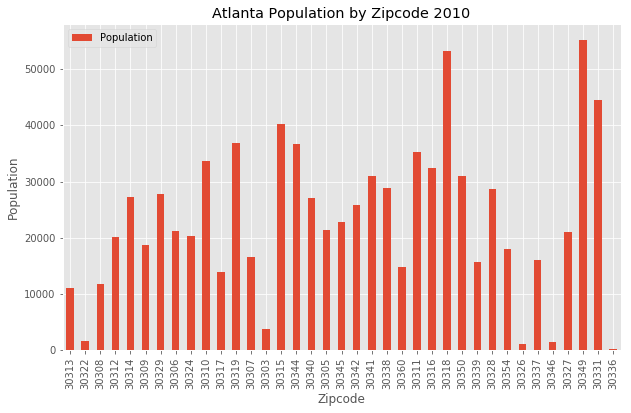

In [130]:
# Create Bar Chart showing population by zip code
# May want to consider binning for grouping different population or wage sizes into small, medium, large - refer to data wrangling course 
# https://gist.github.com/jshorb99/b6ef62989fd1164a6da7c65a68c36640

newzip1.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Zipcode') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Atlanta Population by Zipcode 2010') # add title to the plot

plt.show()

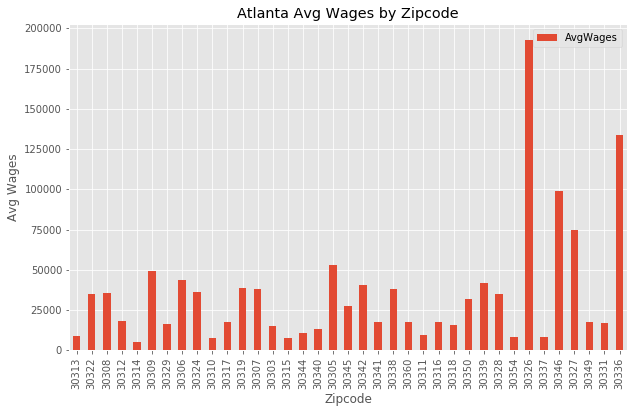

In [137]:
# Create Bar Chart showing avg wages by zip code
newzip2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Zipcode') # add to x-label to the plot
plt.ylabel('Avg Wages') # add y-label to the plot
plt.title('Atlanta Avg Wages by Zipcode') # add title to the plot

plt.show()

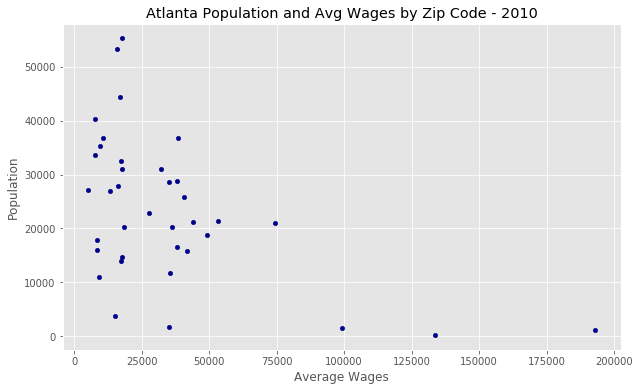

In [145]:
# Create Scatter plot chart showing avg wages vs population

newzip3.plot(kind='scatter', x='AvgWages', y='Population', figsize=(10, 6), color='darkblue')

plt.title('Atlanta Population and Avg Wages by Zip Code - 2010')
plt.xlabel('Average Wages')
plt.ylabel('Population')

plt.show()

### Exploratory Data Analysis - Check linear regression of population vs wages

## Model Development - Correlation & Linear Regression
Determine correlation of population size on avg wages

In [157]:
# Step 1: Get the equation of line of best fit. 
x = newzip3['AvgWages']      # Population on x-axis
y = newzip3['Population']     # Avg Wages on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([-1.87449980e-01,  3.00084009e+04])

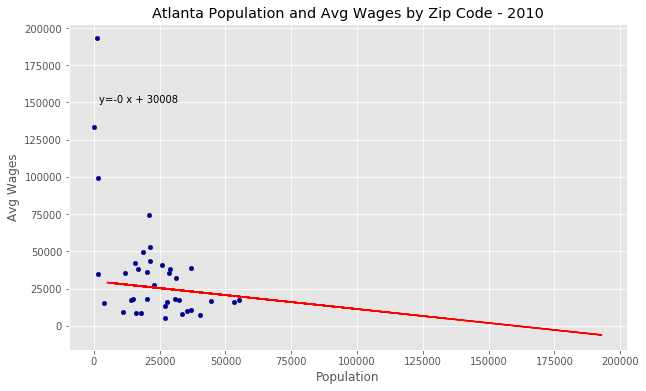

'Population = -0 * AvgWages + 30008'

In [158]:
# plot the regression line
newzip3.plot(kind='scatter', x='Population', y='AvgWages', figsize=(10, 6), color='darkblue')

plt.title('Atlanta Population and Avg Wages by Zip Code - 2010')
plt.xlabel('Population')
plt.ylabel('Avg Wages')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') 
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'Population = {0:.0f} * AvgWages + {1:.0f}'.format(fit[0], fit[1]) 

In [149]:
# Any linear regression between population size and wages?
# %%capture
! pip install seaborn

In [150]:
import seaborn as sns

In [159]:
# Find the correlation between the following columns: population and wages.
newzip3[['Population', 'AvgWages']].corr()

,Population,AvgWages
Population,1.000000,-0.518522
AvgWages,-0.518522,1.000000


In [152]:
# Determine the P-Value
from scipy import stats

In [153]:
# Calculate the Pearson Correlation Coefficient and P-value of 'Population' and 'Wages'.
pearson_coef, p_value = stats.pearsonr(newzip['Population'], newzip3['AvgWages'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.5185222914099851  with a P-value of P = 0.001009995266203385


(0, 205362.9900659834)

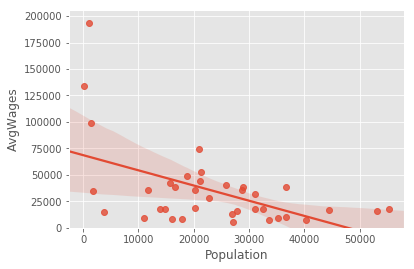

In [154]:
# Population size as potential predictor variable of wages
sns.regplot(x="Population", y="AvgWages", data=newzip3)
plt.ylim(0,)

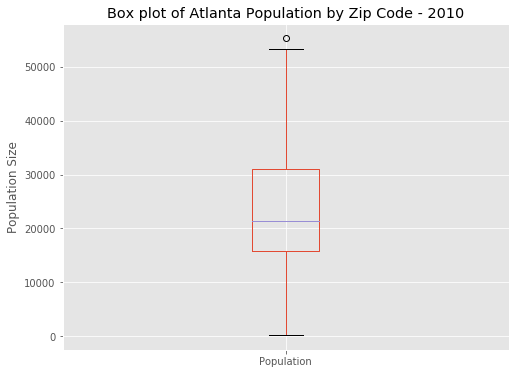

In [160]:
# Create Box Plots to see how the data breaks out and outliers

newzip1.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Atlanta Population by Zip Code - 2010')
plt.ylabel('Population Size')

plt.show()

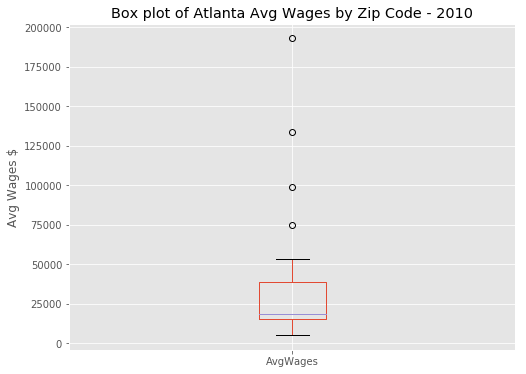

In [161]:
newzip2.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Atlanta Avg Wages by Zip Code - 2010')
plt.ylabel('Avg Wages $')

plt.show()

In [91]:
# Import additional libraries

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


branca-0.4.0         | 26 KB     | ##################################### | 1

In [93]:
# define the world map 
world_map = folium.Map()

# display world map
world_map

In [94]:
# define the world map centered around Atlanta with a low zoom level - 33.7490 N, 84.3880 W
atl_map = folium.Map(location=[33.7490, -84.3880], zoom_start=11)
# atl_map = folium.Map(location=[33.7490, -84.3880], zoom_start=4, tiles='Stamen Terrain') # Option for a different view

# display world map
atl_map

In [95]:
newzip.head()

,Population,People_per_Sq_Mile,City,State,Lat,Long,AvgWages,TotalWages
Zipcode,,,,,,,,
30313,11035,9768.73,ATLANTA,GA,33.76,-84.39,9124,100688737.0
30322,1724,8794.33,ATLANTA,GA,33.79,-84.32,35007,60352068.0
30308,11796,7377.75,ATLANTA,GA,33.77,-84.37,35360,417110003.0
30312,20221,6289.52,ATLANTA,GA,33.74,-84.37,18311,370275696.0
30314,27181,5774.91,ATLANTA,GA,33.75,-84.42,5085,138226697.0


In [96]:
newzip3_copy = newzip3

In [97]:
# Add Markers to the map
# instantiate a feature group for the incidents in the dataframe

incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(newzip.Lat, newzip.Long):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )


# add incidents to map
atl_map.add_child(incidents)

### Create a Choropleth Map to show how areas are shaded or patterned in proportion to the zip code population density and per-capita wages. 
The choropleth map provides an easy way to visualize how a measurement varies across a geographic area
Reference: https://arilamstein.com/creating-zip-code-choropleths-choroplethrzip/

In [101]:
# create a plain map of Atlanta
atl_map1 = folium.Map(location=[33.7490, -84.3880], zoom_start=12, tiles='Mapbox Bright')

In [102]:
atl_map1

In [181]:
newzip.head()

,line,Zipcode,Latitude,Longitude,Population,People_per_Sq_Mile,National_Rank,City,State,Lat,Long,AvgWages,TotalWages
0,1,30313,33.764661,-84.397547,11035,9768.73,#617,ATLANTA,GA,33.76,-84.39,9124.489080,1.006887e+08
1,2,30322,33.795590,-84.327312,1724,8794.33,#712,ATLANTA,GA,33.79,-84.32,35007.978489,5.785480e+08
2,3,30308,33.770877,-84.377873,11796,7377.75,#947,ATLANTA,GA,33.77,-84.37,35360.291879,4.171100e+08
3,4,30312,33.745377,-84.376180,20221,6289.52,"#1,230",ATLANTA,GA,33.74,-84.37,18311.443351,3.702757e+08
4,5,30314,33.757777,-84.431884,27181,5774.91,"#1,393",ATLANTA,GA,33.75,-84.42,5085.416173,1.382267e+08


In [103]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [104]:
world_geo = r'world_countries.json' # geojson file

In [105]:
# download Atlanta geojson file
!wget --quiet https://github.com/codeforamerica/click_that_hood/blob/master/public/data/atlanta.geojson -O atlgeo.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [120]:
newzip.head()
# newzip.set_index('Zipcode', inplace=True) # Set new column as index
# newzip.reset_index() 

,Population,People_per_Sq_Mile,City,State,Lat,Long,AvgWages,TotalWages
Zipcode,,,,,,,,
30313,11035,9768.73,ATLANTA,GA,33.76,-84.39,9124,100688737.0
30322,1724,8794.33,ATLANTA,GA,33.79,-84.32,35007,60352068.0
30308,11796,7377.75,ATLANTA,GA,33.77,-84.37,35360,417110003.0
30312,20221,6289.52,ATLANTA,GA,33.74,-84.37,18311,370275696.0
30314,27181,5774.91,ATLANTA,GA,33.75,-84.42,5085,138226697.0


In [106]:
atl_geo = r'atlgeo.json' # geojson file

In [121]:
# generate choropleth map
atl_map1.choropleth(
    geo_data=world_geo,
    data=newzip,
    columns=['Zipcode','Population'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Atlanta Zip Codes - Avg Wages'
)

# display map
atl_map1

# 

KeyError: 'Zipcode'

In [ ]:
# generate choropleth map
atl_map1.choropleth(
    geo_data=sanfran_geo,
    data=newzip,
    columns=['Zipcode', 'Population'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Atlanta Zip Codes - Population')

# display map
sanfran_map

In [ ]:
# Possibly look into running Clustering via K-Means or otherwise
# Source: https://gist.github.com/jshorb99/e44c6c9505d1c70b30221cc730d82724

In [143]:
# create map of Toronto using latitude and longitude values
map_atlanta = folium.Map(location=[33.7490987, -84.3901849], zoom_start=11)

# add markers to map
for lat, lng, label in zip(newzip['Lat'], newzip['Long'], newzip['Zipcode']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_atlanta

KeyError: 'Zipcode'

## Leveraging Foursquare APIs for getting location data on existing yoga studios

In [122]:
# Reference this example: https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/1aebf365-fe84-468b-ab96-ffa3704d33ce/view?projectid=08bf7410-17df-4744-9fab-c1d3ca4ad7b5&context=wdp

# Import appropriate libraries
import requests # library to handle requests
# import pandas as pd # library for data analsysis
# import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# !conda install -c conda-forge folium=0.5.0 --yes
# import folium # plotting library
# print('Folium installed')

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [123]:
# Define Foursquare credentials and version
CLIENT_ID = 'ZZK1VTQPRGBZBYQQJXR25KBO4TFAWWZKBB2POQIIGZVVVC5R' # your Foursquare ID
CLIENT_SECRET = 'XWFC1FOUXUKLNFYQQQ02R0CP45YGNSIDYBALN255YVTQ4OA5' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZZK1VTQPRGBZBYQQJXR25KBO4TFAWWZKBB2POQIIGZVVVC5R
CLIENT_SECRET:XWFC1FOUXUKLNFYQQQ02R0CP45YGNSIDYBALN255YVTQ4OA5


In [124]:
# In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent foursquare_agent, as shown below.
address = 'Atlanta, GA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

33.7490987 -84.3901849


In [138]:
# Search for italian restaurants within 500 meters of address
search_query = 'yoga'
radius = 500
print(search_query + ' .... OK!')

yoga .... OK!


In [139]:
# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=ZZK1VTQPRGBZBYQQJXR25KBO4TFAWWZKBB2POQIIGZVVVC5R&client_secret=XWFC1FOUXUKLNFYQQQ02R0CP45YGNSIDYBALN255YVTQ4OA5&ll=33.7490987,-84.3901849&v=20180604&query=yoga&radius=500&limit=30'

In [140]:
# Send the GET request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e8ba489f7706a001b280d76'},
 'response': {'warning': {'text': 'There aren\'t a lot of results for "yoga." Try something more general, reset your filters, or expand the search area.'},
  'headerLocation': 'South Downtown',
  'headerFullLocation': 'South Downtown, Atlanta',
  'headerLocationGranularity': 'neighborhood',
  'query': 'yoga',
  'totalResults': 0,
  'suggestedBounds': {'ne': {'lat': 33.7535987045, 'lng': -84.38478295241158},
   'sw': {'lat': 33.744598695499995, 'lng': -84.3955868475884}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': []}]}}

In [141]:
# Get relevant part of JSON and transform it into a pandas dataframe
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

KeyError: 'venues'

In [134]:
# Define information of interest and filter dataframe

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

KeyError: "None of [Index(['name', 'categories', 'id'], dtype='object')] are in the [columns]"

In [ ]:
# Let's visualize the Italian restaurants that are nearby
dataframe_filtered.name

In [ ]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map